# Spectra, spectrograms, and aliasing
### TSE228  Signal Processing. Lab 2, Spring 2025

## 3.4 Square and triangle waves

In [1]:
import numpy as np					# Handle signals as arrays
import matplotlib.pyplot as plt		# Show results as graphs and images
from math import pi, cos, sin, tan	# Mathematical functions on scalars
from cmath import exp, sqrt     	# Complex mathematical functions on scalars

from scipy import signal

import lab2

### 1)
The code for generating square and triangle waves and the curves are shown below

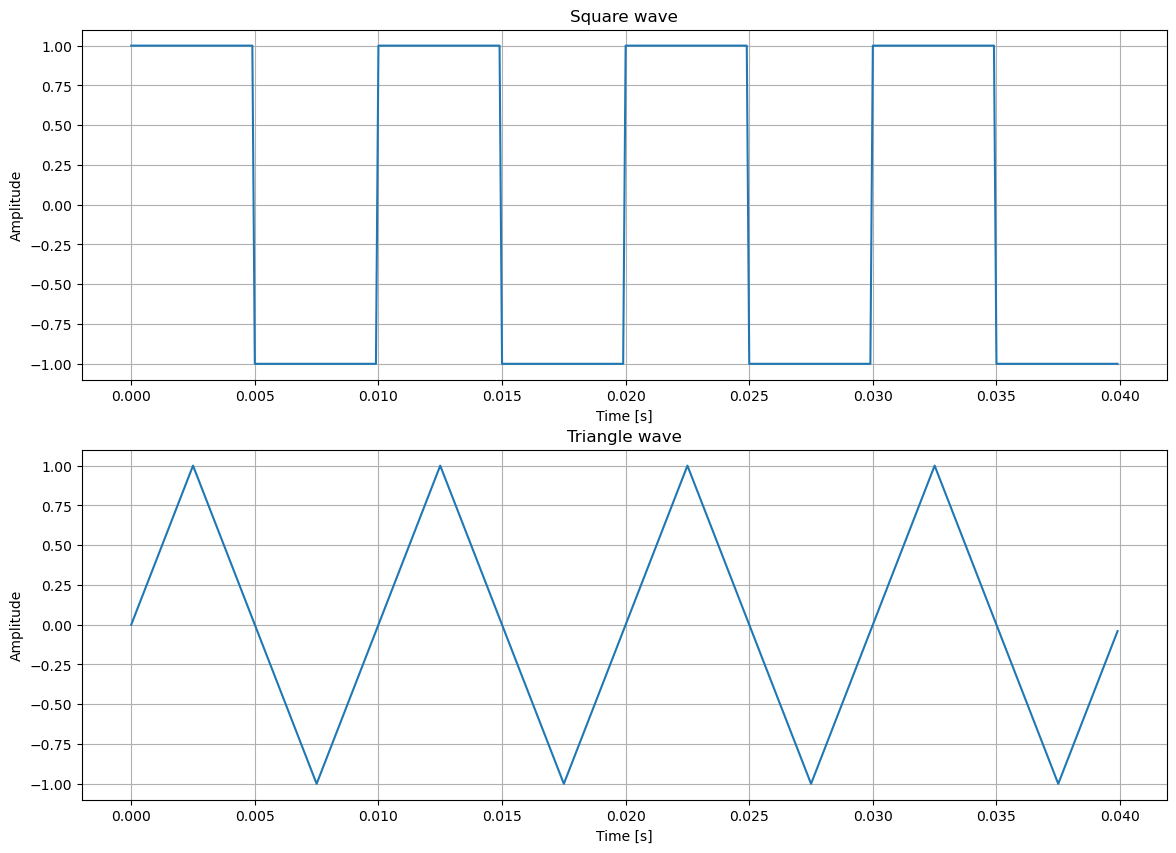

In [12]:
f = 100
duration = 4/f
fs = 100*f
t= np.arange(0, duration, 1/fs)

x_sq = signal.square(2*pi*f*t)
x_tri = signal.sawtooth(2*pi*f*t + pi/2, width = 0.5)

fig=plt.figure(figsize=[14, 10])
ax= fig.add_subplot(2, 1, 1)
ax.plot(t, x_sq)
ax.set(xlabel="Time [s]",
       ylabel="Amplitude",
       title= "Square wave")
ax.grid(True)

ax= fig.add_subplot(2, 1, 2)
ax.plot(t, x_tri)
ax.set(xlabel="Time [s]",
       ylabel="Amplitude",
       title= "Triangle wave")
ax.grid(True)



### 2) 
The spectra of the two curves are shown below.
The values seem to agree , altough accurate reading is difficult, especially for the triangle wave.

Square wave. k= [ 1  3  5  7  9 11], |a_k|  = [0.63661977 0.21220659 0.12732395 0.09094568 0.07073553 0.05787452]
Triangle wave. k= [ 1  3  5  7  9 11], |a_k| = [0.40528473 0.04503164 0.01621139 0.00827112 0.00500352 0.00334946]


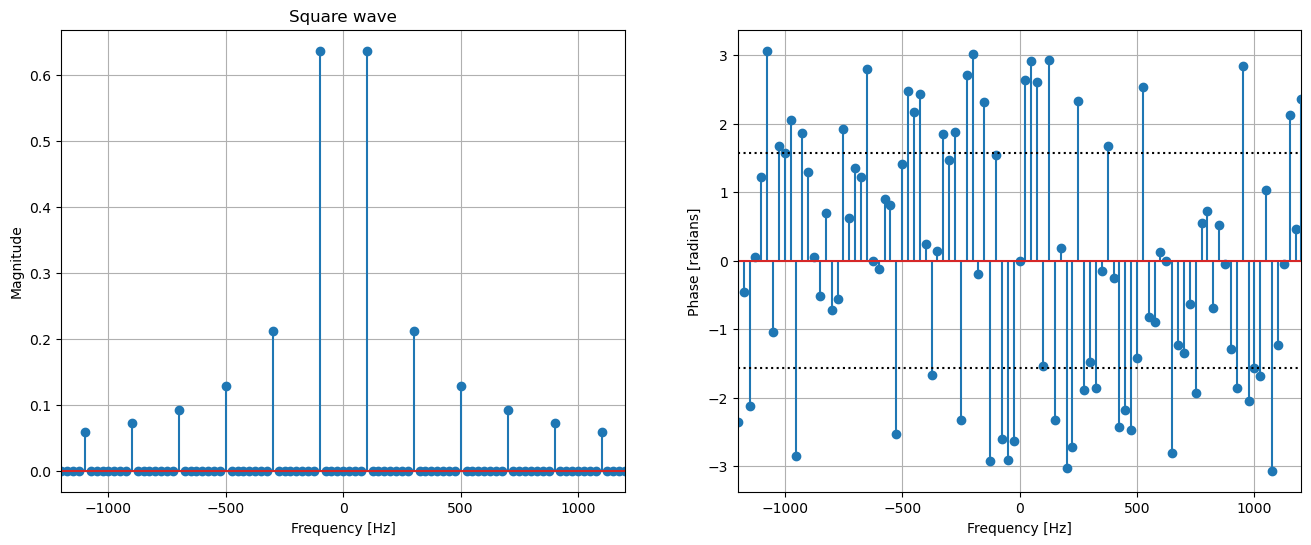

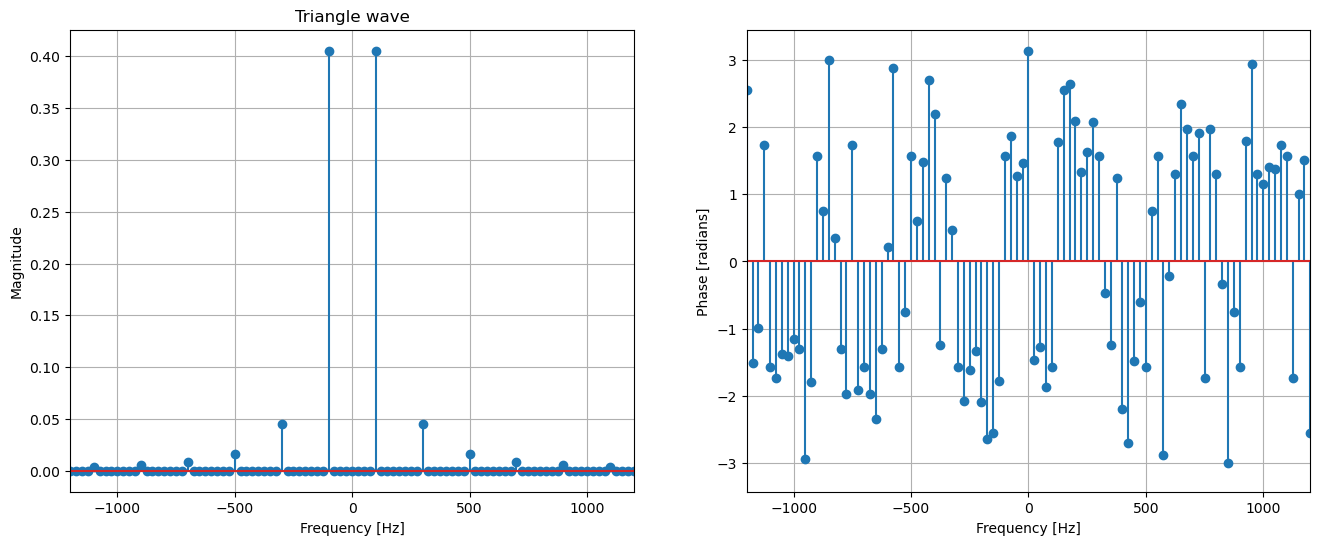

In [13]:
fmax = 1200

ax1, ax2 = lab2.plot_spectrum(x_sq, fs)
ax1.set_xlim(-fmax, fmax)
ax2.set_xlim(-fmax, fmax)
ax1.set_title("Square wave")
ax2.plot( [-fmax, fmax], [-pi/2, -pi/2], 'k:')
ax2.plot( [-fmax, fmax], [pi/2, pi/2], 'k:')

ax1, ax2 = lab2.plot_spectrum(x_tri, fs)
ax1.set_xlim(-fmax, fmax)
ax2.set_xlim(-fmax, fmax)
ax1.set_title("Triangle wave")

k  = np.arange(1, 12, 2)
a_sq = 2/(pi*k)
a_tri = 4/(pi**2 * k**2)

print(f"Square wave. k= {k}, |a_k|  = {a_sq}")
print(f"Triangle wave. k= {k}, |a_k| = {a_tri}")


### 3)
The code for plotting power spectral density on a dB-scale is below.
The larger dynamic range makes it easier to interpret the strength of the higher frequency componenets.

C:\Users\larsh\AppData\Local\Temp\ipykernel_23688\378962170.py:5: RuntimeWarning: divide by zero encountered in log10
  p_db= 10*np.log10(pxx/np.max(pxx))


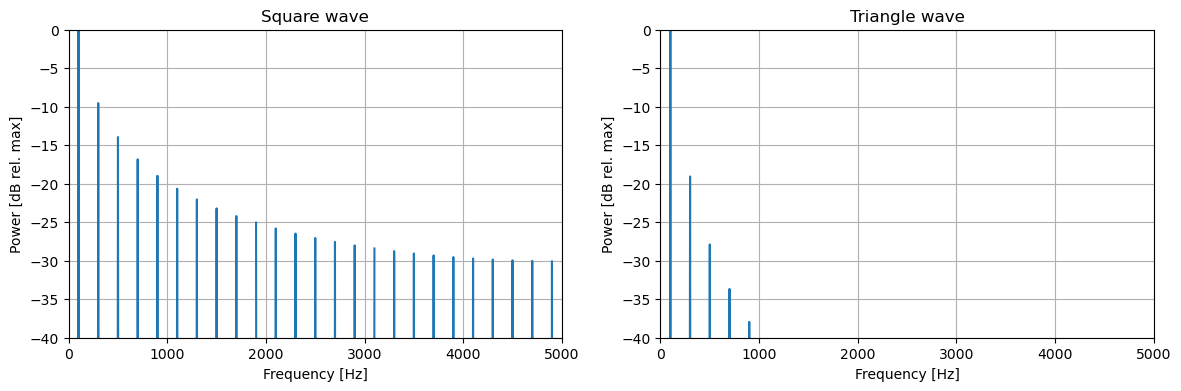

In [14]:
f, pxx = signal.periodogram(x_sq, fs)

fig = plt.figure(figsize=[14, 4])
ax = fig.add_subplot(1,2,1)
p_db= 10*np.log10(pxx/np.max(pxx))
ax.plot(f, p_db)
ax.set(xlabel= "Frequency [Hz]",
       ylabel= "Power [dB rel. max]",
       xlim=(0, fs/2),
       ylim=(-40, 0), 
       title="Square wave")
ax.grid(True)


f, pxx = signal.periodogram(x_tri, fs)
p_db= 10*np.log10(pxx/np.max(pxx))

ax_tri = fig.add_subplot(1,2,2)
ax_tri.plot(f, p_db)
ax_tri.set(xlabel= "Frequency [Hz]",
       ylabel= "Power [dB rel. max]",
       xlim=(0, fs/2),           
       ylim=(-40, 0), 
       title="Triangle wave")
ax_tri.grid(True)

### 4)
The spectrograms show horizontal lines, as expected since the frequencies are constant.
The strongest line is at the fundamental frequency $f_0$, oter lines are seen at the odd harmonics of the fundamental. The harmonics decrease as the frequency increases, and they decrease more for the triangular than for the square wave.

Text(0.5, 1.0, 'Triangle wave')

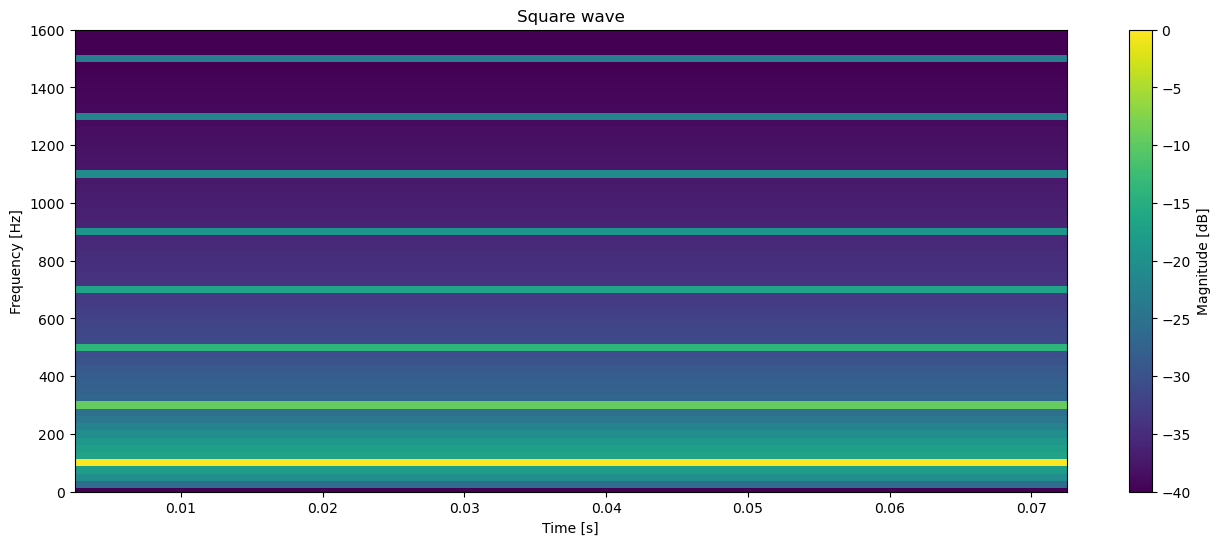

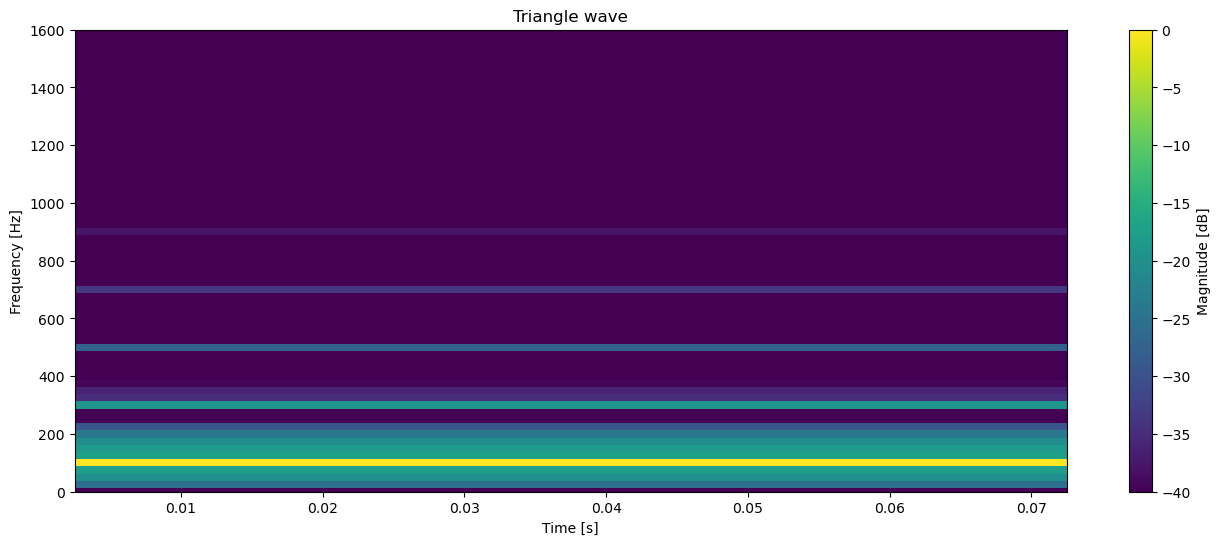

In [25]:
f = 100
duration = 10/f
fs = 100*f
t= np.arange(0, duration, 1/fs)

x_sq = signal.square(2*pi*f*t)
x_tri = signal.sawtooth(2*pi*f*t + pi/2, width = 0.5)

fmax = 1600
ax, sx_image = lab2.plot_spectrogram(x_sq, t, fs, 400, fmax)
ax.set_title(f"Square wave")

ax, sx_image = lab2.plot_spectrogram(x_tri, t, fs, 400, fmax)
ax.set_title(f"Triangle wave")

### 5)
The spectrogram for the square chirp shows lines both at the fundamental and at its odd harmonics.

Alising is never reached for the fundamental frequency, but the harmonics are aliased and starts gong downwards when they reach the Nyquist limit, $f_s/2$.
Aliasing are first reached for the highest harmonics, e.g., the 5th harmonic and higher go up and down several times.


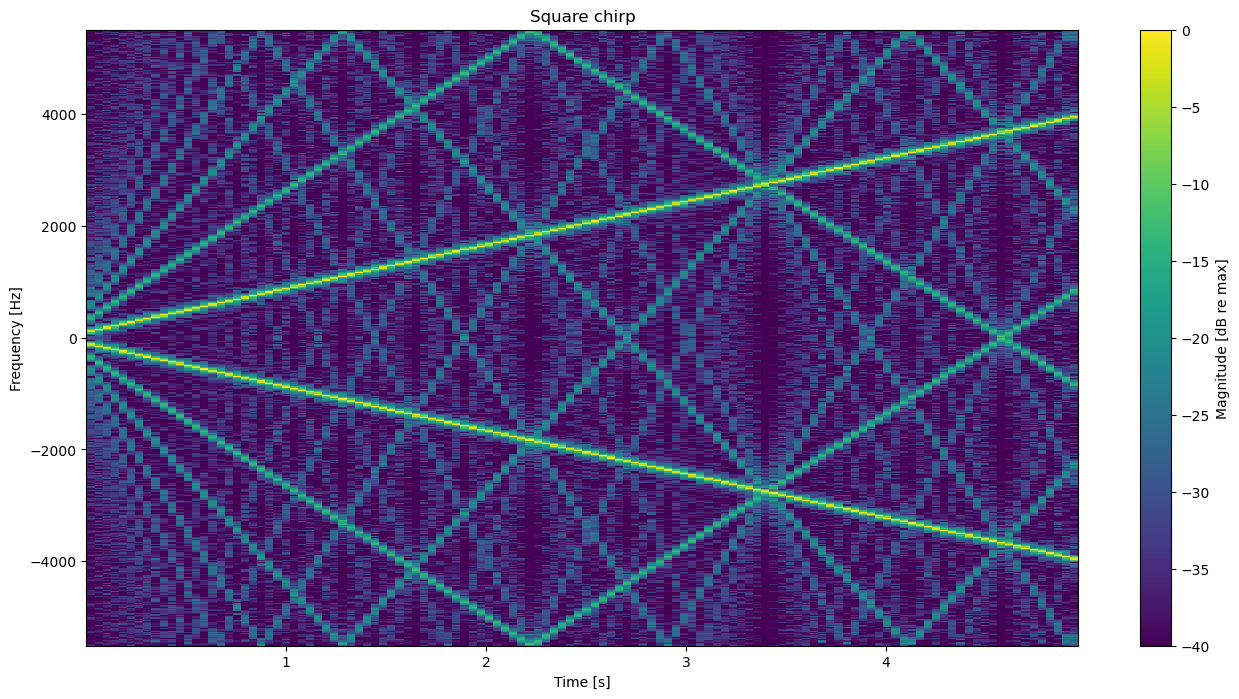

In [26]:
import sounddevice as sd
from scipy.fft import fft, fftshift, fftfreq	

f1 = 100
f2 = 4000
fs = 11025

duration = 5.0
t = np.arange(0, duration, 1/fs)
f0 = f1
mu = (f2-f1)/(2*duration)

psi = 2*pi*mu*t**2 + 2*pi*f0*t 

x = signal.square(psi)

# Calculate spectrogram
f, t, sx = signal.spectrogram(x, fs, nperseg=512, return_onesided=False, detrend=False)
f = fftshift(f)
sx = fftshift(sx, axes=0)
sx_db = 10*np.log10(sx/sx.max())   # Convert to dB

# Plot spectrogram
fig = plt.figure(figsize=(16, 8))  # Define figure for results

ax = fig.add_subplot(1, 1, 1)
sx_image = ax.pcolormesh(t, f, sx_db, vmin=-40, cmap="viridis")

ax.set(xlabel = "Time [s]",
       ylabel = 'Frequency [Hz]',
       ylim = (-fs/2, fs/2), 
       title = "Square chirp" )

fig.colorbar(sx_image, label="Magnitude [dB re max]")  # Colorbar for intensity

#sd.play(x, fs)
